# Problem Statement

In [1]:
#import all modules
import numpy as np
import matplotlib.pyplot as plt
import math
from operator import mul

In [2]:
# poisson distribution
def poisson_pmf(Lambda, no_of_events):
    '''
    Arguments :
        Lambda(float, >0): the value of lambda
        no_of_events(int, 0 to inf): no of the events
    returns :
        probability(float, 0 to 1): probability of no_of_events occuring 
    '''
    probability = np.exp(-Lambda)*math.pow(Lambda, no_of_events) / np.prod([i for i in range(1, no_of_events+1)])

    return probability

# Binomial Random Variable

A binomial random variable models the number of successes in a fixed number of independent Bernoulli trials, each with a constant probability of success.

>The probability of getting exactly k successes in n trials is given by:

$P(X = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}$


Where:

- $P(X = k):$ Probability of k successes in `n` trials

- $\binom{n}{k}:$ Binomial coefficient, also denoted as `nCk` or `n` choose `k`, which represents the number of ways to choose `k` items from a set of `n` items.

- $p:$ Probability of success on a single trial

- $(1-p)^{n-k}:$ Probability of n-k failures

**Example:**

Consider flipping a coin 10 times. Let's say the probability of getting heads on a single flip is `p = 0.5`.

- P(X = 3): Probability of getting `3` heads in `10` flips = $\binom{1}{3} * 0.5^{3} * 0.5^{7}$

>The binomial random variable helps us understand and quantify the number of successes in a fixed number of independent trials.

In [10]:
import math

def get_binomial_prob(n: int, p: float, vals: list[int]) -> list[float]:
    """
    Calculates the binomial probability for a given set of values, discarding and notifying about negative values.

    Args:
        n (int): The number of trials.
        p (float): The probability of success on each trial.
        vals (list): A list of integer values representing the number of successes.

    Returns:
        list: A list of probabilities corresponding to the positive input values,
              where the probability at index i corresponds to the value at index i in the input list.

    Raises:
        ValueError: If the input probability `p` is not between 0 and 1,
                    or if the number of trials `n` is non-positive.

    """
    if not 0 < p < 1:
        raise ValueError("Probability p must be between 0 and 1.")
    if n <= 0:
        raise ValueError("Number of trials n must be positive.")
    
    # Identify and discard negative values
    valid_vals = []
    for val in vals:
        if isinstance(val, int) and 0 <= val <= n:
            valid_vals.append(val)
        elif isinstance(val, int) and val < 0:
            print(f"Discarded negative value: {val}")
    
    # Compute probabilities for valid values
    probs = [math.comb(n, k) * p**k * (1-p)**(n-k) for k in valid_vals]
    return probs

probabilities = get_binomial_prob(10, 0.5, [2, 3, -4, 4, -7])
print(probabilities)


Discarded negative value: -4
Discarded negative value: -7
[0.0439453125, 0.1171875, 0.205078125]


In [11]:
n= 10
p= 0.5
vals = range(1,11)
probs = get_binomial_prob(n, p, vals)

for val, prob in zip(vals, probs):
    print(f"P(X={val}) = {prob}")

P(X=1) = 0.009765625
P(X=2) = 0.0439453125
P(X=3) = 0.1171875
P(X=4) = 0.205078125
P(X=5) = 0.24609375
P(X=6) = 0.205078125
P(X=7) = 0.1171875
P(X=8) = 0.0439453125
P(X=9) = 0.009765625
P(X=10) = 0.0009765625


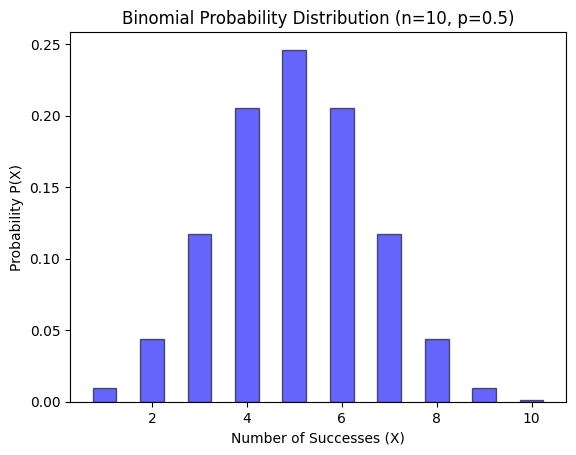

In [12]:
import matplotlib.pyplot as plt

plt.bar(vals, probs, color='blue', edgecolor='black', align='center', alpha=0.6, width=0.5)
plt.xlabel("Number of Successes (X)")
plt.ylabel("Probability P(X)")
plt.title("Binomial Probability Distribution (n=10, p=0.5)")
plt.show()